<a href="https://www.kaggle.com/code/anucoolchandra/regression-analysis-cars-mileage?scriptVersionId=105902842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [2]:
#The data is technical spec of cars."The data concerns city-cycle fuel consumption in miles per gallon,
#to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

#I will try to construct a model which predicts the mpg (miles per gallon) from different features of cars.
#Importing relevant libraries..
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns


In [3]:
#Assigning a variable df for this dataframe, using pandas library.

df = pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv')
df
type(df)

pandas.core.frame.DataFrame

In [4]:
#Shape of this dataframe
df.shape

(398, 9)

In [5]:
#Finding useful information regarding this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#Here, horsepower, which is a variable which should contain integer/floating type values, is showing as object.
#Thus converting object to floating type values
#df['horsepower']=df['horsepower'].astype(np.float64)

In [7]:
#While converting object to float, there was this following error "ValueError: could not convert string to float: '?' "
#It is observed from the error that horsepower column contains  some'?' values
#Thus converting '?' to nan values and then converting horsepower to floating type values.
#Checking whether conversion done or not.
df=df.replace("?",np.nan)
df['horsepower']=df['horsepower'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Cleaning the data, i.e. replacing nan values.**


In [8]:
#Checking the dataframe for nan values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


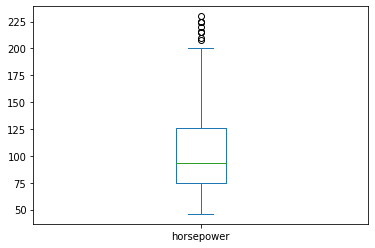

In [9]:
#Only horsepower column has nan values.
#Checking 'horsepower' for outliers.
print(df['horsepower'].plot(kind='box'))

In [10]:
#Horsepower has too many outliers, thus for imputing the nan values, we will use the median values.
#After imputing, checking the nan counts.

df['horsepower'].fillna(df['horsepower'].median(), inplace = True)

df.horsepower.isnull().sum()

0

In [11]:
#Getting an overview of the dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Our dataset has target variable mpg (miles per gallon) which is going to be predicted using the model.
The feature variables are -
1. No. of Cylinders
2. Displacement
3. Horsepower
4. Weight
5. Acceleration
6. Model Year
7. Origin

  # **EDA**
  **Univariate Analysis**

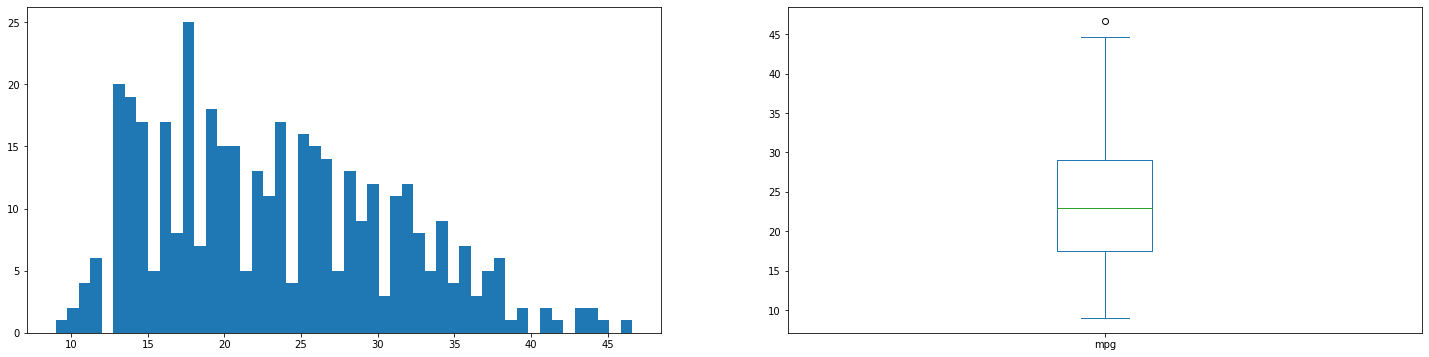

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


In [12]:
#Plotting the target variable mpg (miles per gallon) first in histogram and then in boxplot


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.mpg,50)

plt.subplot(1,2,2)
df['mpg'].plot(kind='box')

plt.show()

print(df['mpg'].describe())

* The plot is rightly skewed
* mode is somewhere around 17 which is away from mean and median

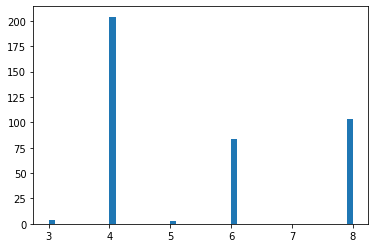

In [13]:
#Plotting another variable 'no.of cylinders' first in histogram and then in boxplot


plt.hist(df.cylinders,50)
plt.show()

#print(df['cylinders'].plot(kind='box'))
#print(df['cylinders'].describe())
#from scipy import stats
#stats.mode(df['cylinders'])

 Cars in the sample have no. of cylinders in the range of [3,8]. Also we observe that there is no car which has 7 cylinders.
This is a categorical data. We will analyze it later. 

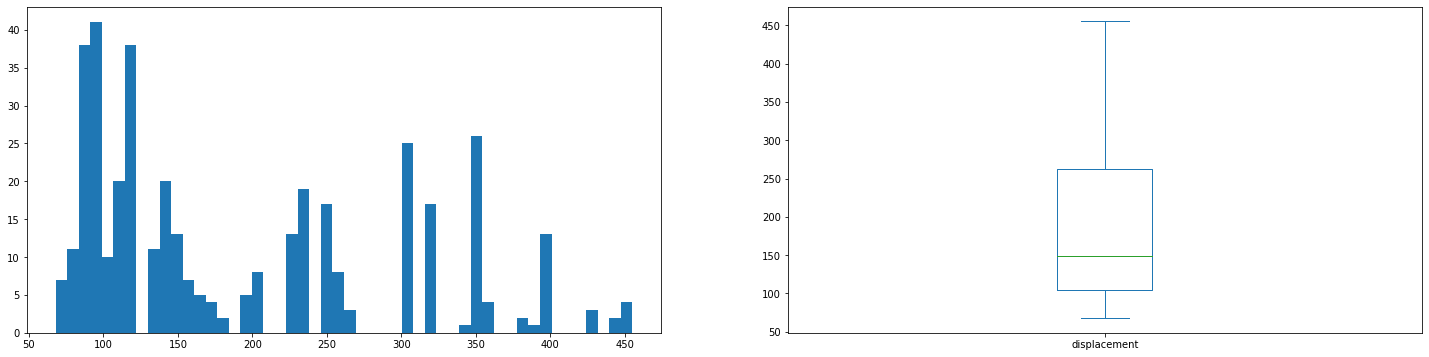

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64


In [14]:
#Plotting another variable 'displacement' first in histogram and then in boxplot


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.displacement,50)

plt.subplot(1,2,2)
df['displacement'].plot(kind='box')

plt.show()

print(df['displacement'].describe())

From the above plot of displacement we find that the data ranges between 68 and 455. Most of the cars have displacement of 100, 125, 300, 350, 175, and 275 . There are fewer cars which have displacement greater than 400. The data is almost evenly distributed as no outlier(s) are observed.


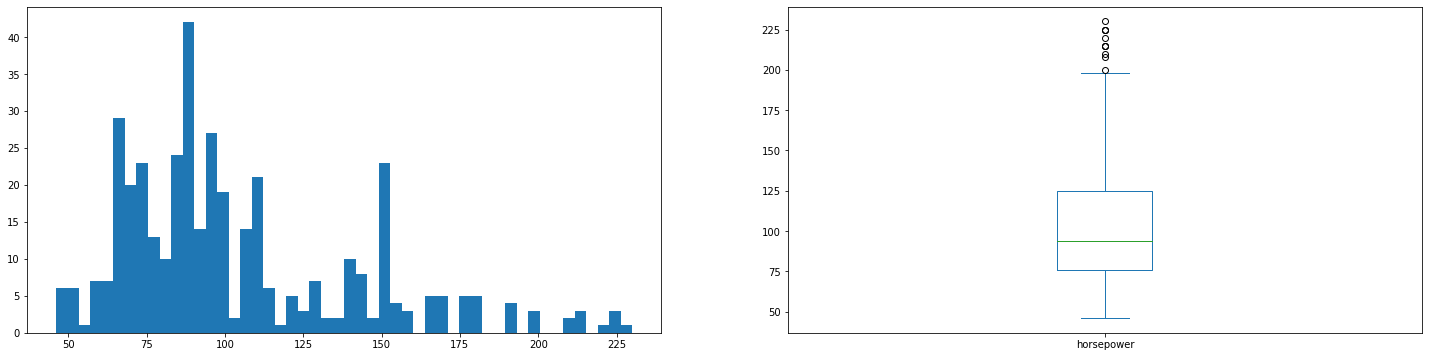

count    398.000000
mean     104.304020
std       38.222625
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64


In [15]:
#Plotting another variable 'horsepower' first in histogram and then in boxplot


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.horsepower,50)

plt.subplot(1,2,2)
df['horsepower'].plot(kind='box')

plt.show()

print(df['horsepower'].describe())


horsepower in the above dataset ranges from 50 to 230. the normal distribution here is right skewed. Some outliers are there in the higher side however data is mostly spread between 60 to 100.

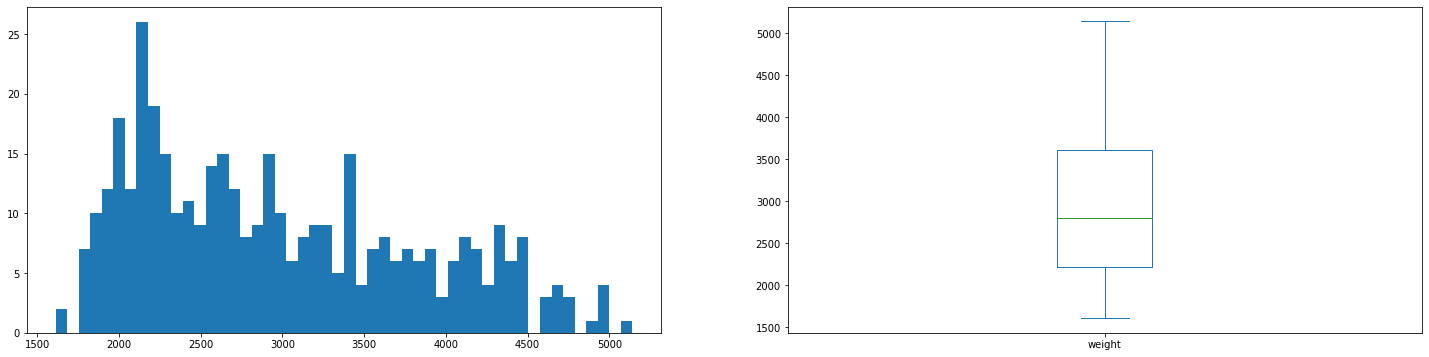

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64


In [16]:
#Plotting another variable 'weight' first in histogram and then in boxplot

plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.weight,50)

plt.subplot(1,2,2)
df['weight'].plot(kind='box')

plt.show()

print(df['weight'].describe())

this is again a right skewed distribution which shows that in the sample data, we have more light weighted cars in the sample.

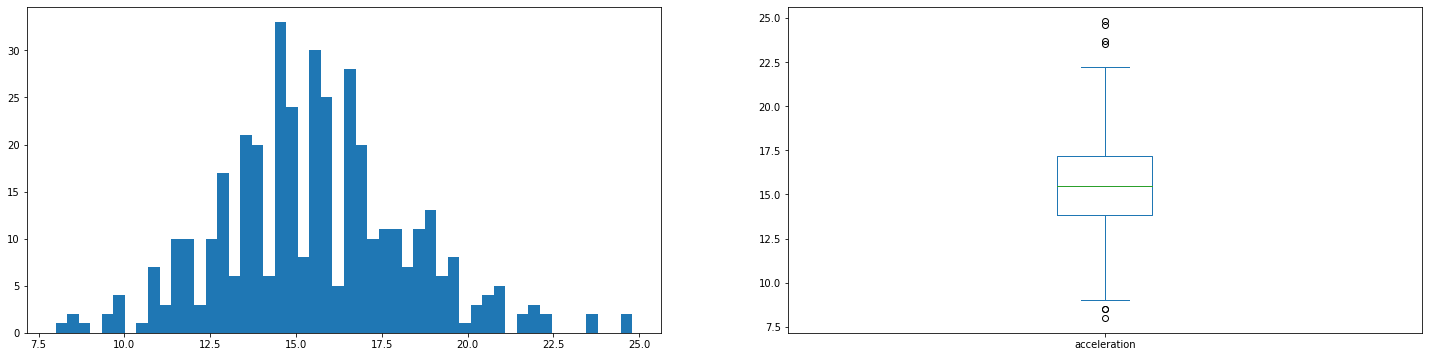

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64


In [17]:
#Plotting another variable 'acceleration' first in histogram and then in boxplot


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.acceleration,50)

plt.subplot(1,2,2)
df['acceleration'].plot(kind='box')

plt.show()

print(df['acceleration'].describe())


The displacement ranges from 8 to 24. The normal distribution shows almost no skew, as the median lies almost in the centre.

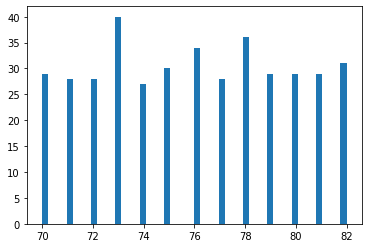

In [18]:
#Plotting another variable 'model year' first in histogram and then in boxplot


plt.hist(df["model year"],50)
plt.show()

#df['model year'].plot(kind='box')
#df['model year'].describe()


This dataset represents the year of the manufacture of the cars. We have cars manufactured in 1970 to 1982 and the data is almost equally divided between all tgese years. This is a categorical data. We will analyze it later.

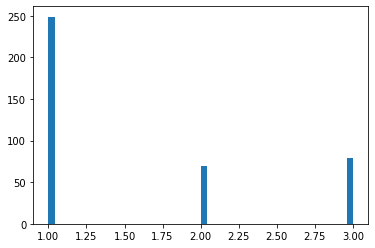

In [19]:
#Plotting another variable 'origin' first in histogram and then in boxplot


plt.hist(df.origin,50)
plt.show()

#df['origin'].plot(kind='box')

#df['origin'].describe()


In the origin column there are three types of values ie 1,2 & 3.
1 reprsents cars of American Origin, 2 for European Origin, and 3 for Asian origin.
This is a categorical data. We will analyze it later.

In [20]:
#The last category of the dataset is car name. We are not alanyzing car name because it contains almost unique values.
df['car name'].nunique()

305

# **Bivariate Analysis**
we will now plot the car mileage(mpg) with each of the features and see which feature effects the data by what extent

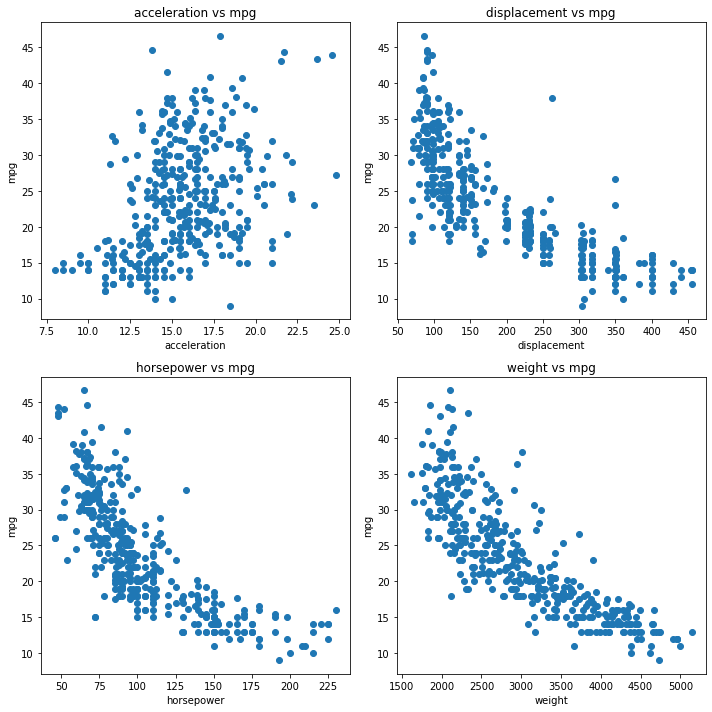

In [21]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(df[x],df['mpg'])
    plt.title(x+' vs mpg')
    plt.ylabel('mpg')
    plt.xlabel(x)

plt.figure(figsize=(10,10))

scatter('acceleration', 1)
scatter('displacement', 2)
scatter('horsepower', 3)
scatter('weight', 4)
plt.tight_layout()



Inference :

    displacement, horsepower and length seems to have a negative correlation with mpg.
    acceleration doesn't show any significant trend with price.



# **Visualising Categorical Data**
First plotting frequency histogram of the categorical features ie Cylinders, Model Year and Origin.
then plotting box plots of the three features vs the target variable mpg(miles per gallon) and then plotting bar graphs of the features vs the average miles per gallon corresponding to the particular variable.

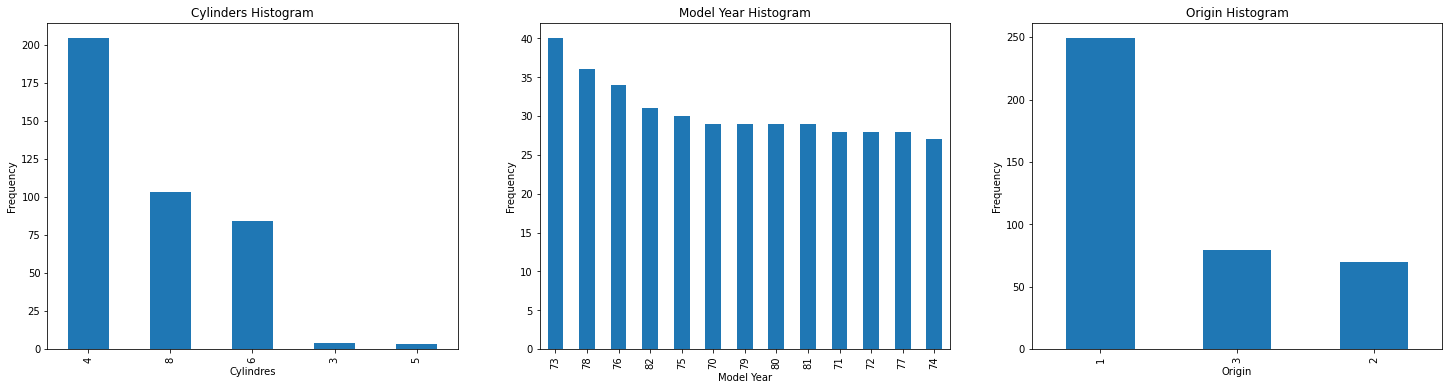

In [22]:

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.cylinders.value_counts().plot(kind = 'bar')
plt.title('Cylinders Histogram')
plt1.set(xlabel = 'Cylindres', ylabel='Frequency')

plt.subplot(1,3,2)
plt1 = df['model year'].value_counts().plot(kind = 'bar')
plt.title('Model Year Histogram')
plt1.set(xlabel = 'Model Year', ylabel='Frequency')

plt.subplot(1,3,3)
plt1 = df.origin.value_counts().plot(kind = 'bar')
plt.title('Origin Histogram')
plt1.set(xlabel = 'Origin', ylabel='Frequency')

plt.show()



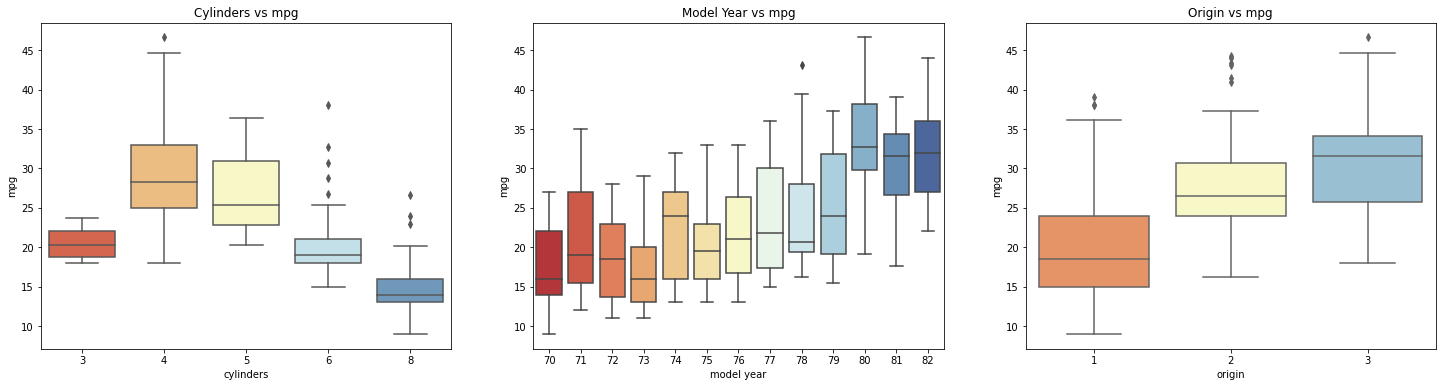

In [23]:
plt.figure(figsize=(25, 6))


plt.subplot(1,3,1)
plt.title('Cylinders vs mpg')
sns.boxplot(x=df.cylinders, y=df.mpg, palette=("RdYlBu"))

plt.subplot(1,3,2)
plt.title('Model Year vs mpg')
sns.boxplot(x=df['model year'], y=df.mpg, palette=("RdYlBu"))

plt.subplot(1,3,3)
plt.title('Origin vs mpg')
sns.boxplot(x=df.origin, y=df.mpg, palette=("RdYlBu"))

plt.show()

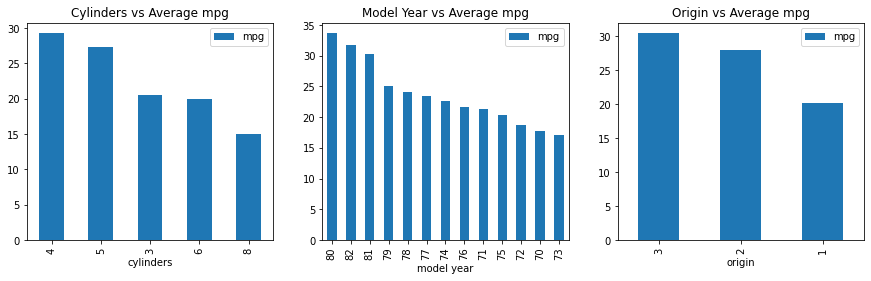

In [24]:
#plt.figure(figsize=(6.4,4.8))

figure, axes = plt.subplots(1, 3)

figure_size = (15,4)

df1 = pd.DataFrame(df.groupby(['cylinders'])['mpg'].mean().sort_values(ascending = False))
#ax = plt.subplot(2,2,1)
df1.plot.bar(figsize=figure_size, ax = axes[0], title = 'Cylinders vs Average mpg')
#_ = plt.title('Cylinders vs Average mpg')

#plt.show()



df2 = pd.DataFrame(df.groupby(['model year'])['mpg'].mean().sort_values(ascending = False))
##plt.subplot(2,2,2)
df2.plot.bar(figsize=figure_size, ax = axes[1], title = 'Model Year vs Average mpg' )


#plt.show()


df3 = pd.DataFrame(df.groupby(['origin'])['mpg'].mean().sort_values(ascending = False))
#plt.subplot(2,2,3)
df3.plot.bar(figsize=figure_size, ax = axes[2], title = 'Origin vs Average mpg')
#_ = plt.title('Origin vs Average mpg')

#plt.show()

plt.show()

**Inferences**
1. Cars with 4 cylinders have maximum frequency as well as performance in terms of mpg is also good.
2. Cars with 8 cylinders do not give better mileage.
3. Model year does not have a significant effect in mileage as there are cars in the sample which are distributed among different model years widely and the mileage they provide cover a large range of mpg
4. cars with origin 1 are more abundant whereas cars with origin 3 provide better mileage.

**List of significant variables after visual analysis**
1. Displacement
2. Horsepower
3. Weight
4. Cylinders


In [25]:
df_new = df[['mpg' , 'displacement' , 'horsepower' , 'weight' , 'cylinders']]
df_new.head()

,mpg,displacement,horsepower,weight,cylinders
0,18.0,307.0,130.0,3504,8
1,15.0,350.0,165.0,3693,8
2,18.0,318.0,150.0,3436,8
3,16.0,304.0,150.0,3433,8
4,17.0,302.0,140.0,3449,8


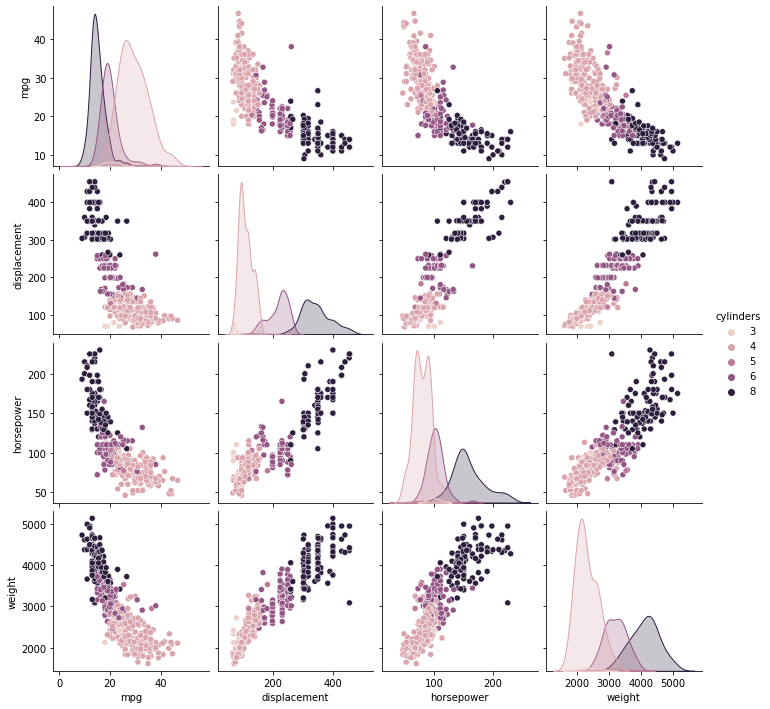

In [26]:
#This is another analysis to come up with an outlook for all the other features with respect to Cylinders.
import seaborn as sns 
sns.pairplot(df_new, hue = 'cylinders')
plt.show()

In [27]:

df_new = df[['mpg' , 'displacement' , 'horsepower' , 'weight','cylinders' ]]
df_new.head()

,mpg,displacement,horsepower,weight,cylinders
0,18.0,307.0,130.0,3504,8
1,15.0,350.0,165.0,3693,8
2,18.0,318.0,150.0,3436,8
3,16.0,304.0,150.0,3433,8
4,17.0,302.0,140.0,3449,8


# **Heatmaps** for Correlation

                   mpg  displacement  horsepower    weight  cylinders
mpg           1.000000     -0.804203   -0.773453 -0.831741  -0.775396
displacement -0.804203      1.000000    0.895778  0.932824   0.950721
horsepower   -0.773453      0.895778    1.000000  0.862442   0.841284
weight       -0.831741      0.932824    0.862442  1.000000   0.896017
cylinders    -0.775396      0.950721    0.841284  0.896017   1.000000


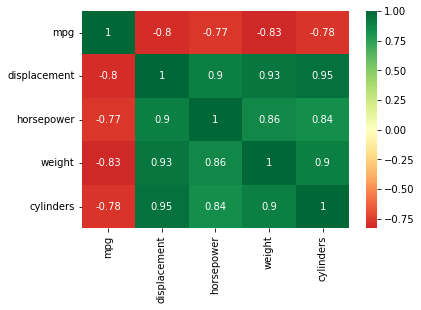

In [28]:
print(df_new.corr())
plt.figure(figsize=(6,4))  
p=sns.heatmap(df_new.corr(), annot=True,cmap ='RdYlGn', center = 0)  

**Feature Scaling**

In [29]:

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x =  pd.DataFrame(sc_x.fit_transform(df_new.drop(["mpg"],axis = 1)),columns=['displacement', 'horsepower', 'weight', 'cylinders'])
y  = df_new.mpg
x.head()


,displacement,horsepower,weight,cylinders
0,1.090604,0.673118,0.630870,1.498191
1,1.503514,1.589958,0.854333,1.498191
2,1.196232,1.197027,0.550470,1.498191
3,1.061796,1.197027,0.546923,1.498191
4,1.042591,0.935072,0.565841,1.498191


**train test split**

In [30]:

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

**Model Building**

In [31]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

**Model Evaluation**

In [32]:
y_pred = regr.predict(train_x)
#print("accuracy: "+ str(regr.score(train_x,train_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(train_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(train_y,y_pred)))
R2 = r2_score(train_y,y_pred)
print('R Squared: {}'.format(R2))
n=train_x.shape[0]
p=train_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean absolute error: 3.299850281139899
Mean squared error: 18.327139005282728
R Squared: 0.7024748675623149
Adjusted R Squared: 0.6992172931195666


**TESTING THE MODEL**

In [33]:
y_pred = regr.predict(test_x)
#print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Mean absolute error: 3.1161264859719098
Mean squared error: 17.21954241067806
R Squared: 0.7084249166050571
Adjusted R Squared: 0.7008841816896707


**Manual Prediction**

In [34]:
train_x.iloc[0]

displacement   -0.685872
horsepower     -0.505677
weight         -0.780849
cylinders      -0.856321
Name: 112, dtype: float64

In [35]:
regr.predict(np.array([0.6,-20, 0.4,0]).reshape(1, -1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([55.24232792])

**Another Approach by using one hot encoding of the cylinders column**

In [36]:
df_new.head()

,mpg,displacement,horsepower,weight,cylinders
0,18.0,307.0,130.0,3504,8
1,15.0,350.0,165.0,3693,8
2,18.0,318.0,150.0,3436,8
3,16.0,304.0,150.0,3433,8
4,17.0,302.0,140.0,3449,8


In [37]:

temp = pd.get_dummies(df_new['cylinders'], drop_first = True)
df_new = pd.concat([df_new, temp], axis = 1)
df_new.drop(['cylinders'], axis = 1, inplace = True)

In [38]:
df_new  =df_new.rename(columns={4: 'four cylinders', 5: 'five cylinders', 6: 'six cylinders', 8: 'eight cylinders'})

In [39]:
df_new.head()

,mpg,displacement,horsepower,weight,four cylinders,five cylinders,six cylinders,eight cylinders
0,18.0,307.0,130.0,3504,0,0,0,1
1,15.0,350.0,165.0,3693,0,0,0,1
2,18.0,318.0,150.0,3436,0,0,0,1
3,16.0,304.0,150.0,3433,0,0,0,1
4,17.0,302.0,140.0,3449,0,0,0,1


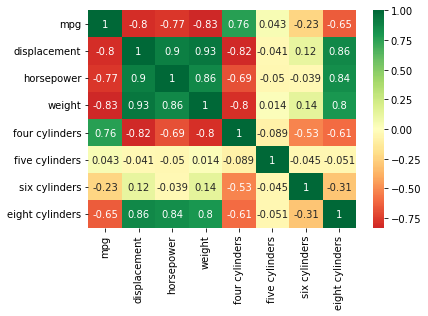

In [40]:

plt.figure(figsize=(6,4))  
p=sns.heatmap(df_new.corr(), annot=True,cmap ='RdYlGn', center = 0) 

**FEATURE SCALING**

In [41]:
#five cylinders is being dropped as it is not well correlated to the target variable well.
df_new.pop('five cylinders')
df_new.head()

,mpg,displacement,horsepower,weight,four cylinders,six cylinders,eight cylinders
0,18.0,307.0,130.0,3504,0,0,1
1,15.0,350.0,165.0,3693,0,0,1
2,18.0,318.0,150.0,3436,0,0,1
3,16.0,304.0,150.0,3433,0,0,1
4,17.0,302.0,140.0,3449,0,0,1


In [42]:


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x =  pd.DataFrame(sc_x.fit_transform(df_new.drop(["mpg"],axis = 1)),columns=['displacement', 'horsepower', 'weight', 'four cylinders',
       'six cylinders' , 'eight cylinders'])
y  = df_new.mpg
x.head()



,displacement,horsepower,weight,four cylinders,six cylinders,eight cylinders
0,1.090604,0.673118,0.630870,-1.025449,-0.517219,1.692359
1,1.503514,1.589958,0.854333,-1.025449,-0.517219,1.692359
2,1.196232,1.197027,0.550470,-1.025449,-0.517219,1.692359
3,1.061796,1.197027,0.546923,-1.025449,-0.517219,1.692359
4,1.042591,0.935072,0.565841,-1.025449,-0.517219,1.692359


**TRAIN TEST SPLIT**

In [43]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

**BUILDING MODEL**

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)


y_pred = regr.predict(train_x)
print("accuracy: "+ str(regr.score(train_x,train_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(train_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(train_y,y_pred)))
R2 = r2_score(train_y,y_pred)
print('R Squared: {}'.format(R2))
n=train_x.shape[0]
p=train_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 73.43783259863936%
Mean absolute error: 3.025673004527529
Mean squared error: 16.36192983960053
R Squared: 0.7343783259863936
Adjusted R Squared: 0.7294955746258494


In [45]:
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 72.88915047124098%
Mean absolute error: 2.896400561178163
Mean squared error: 16.01084762848683
R Squared: 0.7288915047124098
Adjusted R Squared: 0.717000781234884


**Manual Prediction**

In [46]:
regr.predict(np.array([0.6,-20, 0.4,0,0,0]).reshape(1, -1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([75.25789268])